<h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 8</h6>
<h6 align="center">Page Rank</h6>
<h6 align="center">29 kwietnia 2020</h6>

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import random
epsilon = 0.0000001
inteartions = 99999
import warnings
warnings.filterwarnings('ignore')

<b>Zadanie 1 Prosty ranking wierzchołków</b> <br><hr>
Zaimplementuj prosty model błądzenia przypadkowego po graﬁe skierowanym:

\begin{equation*}
r(u) = d\sum_{v\epsilon B_{u}}^{} \frac{r(v)}{N_{v}}
\end{equation*}

gdzie r(u) oznacza ranking wierzchołka u, parametr c jest używany w normalizacji, Bu jest zbiorem wierzchołków, z których wychodzą krawędzie do wierzchołka u, Fv oznacza zbiór wierzchołków, do których dochodzą krawędzie z wierzchołka v, a Nv = |Fv|. W zapisie macierzowym:

\begin{equation*}
r = dAr
\end{equation*}

gdzie <b>A</b> jest macierzą adiacencji grafu, w której każdy wiersz u jest przeskalowany wyjściowym stopniem wierzchołka u

\begin{equation*}
A_{u,v} = \left\{
\begin{matrix} 
\frac{1}{N_{u}}\textrm{     jeśli krawędź (u, v) instnieje}
\\ 
0 \textrm{  w przeciwnym wypadku}
\end{matrix}\right.
\end{equation*}

Zauważ, że<b> r</b> może zostać obliczony jako dominujący wektor własny macierzy<b> A</b> za pomocą metody potęgowej (dominujący wektor własny<b> q1</b> znormalizowany za pomocą normy L1). Przetestuj poprawność obliczeń korzystając z 3 dowolnych silnie spójnych grafów skierowanych o liczbie wierzchołków większej niż 10.

* Funckja obliczająca dominująćy wektor własny

In [7]:
def norm(vec):
    suma = 0
    for i in vec:
        suma += i
    return suma


def power_finding(size,A):
    x0 = np.array([1 for i in range(size)])
    x0 = np.array(x0/norm(x0))
    out = False

    for i in range(inteartions):

        x1 = np.dot(A,x0)
        x2 = x1/norm(x1)

        if np.linalg.norm(x2 - x0) < epsilon:
            out = True
        x0 = x2
        if out:
            break

    return x0/norm(x0)

* Funckja PageRank

In [10]:
def page_rank(G):
    V = len(G.nodes())
    if(V <= 0):
        return
#     zmienienie Grafu w tablice dwuwymiarową
    A = nx.to_numpy_array(G)
#     dzielenie elementów przez ilosc wierzchołków wychodzących
    for e in G.edges():
        n = 0
        for a in A[e[0]]:
            if a > 0:
                n += 1
        A[e[0]][e[1]]/= n

    A = np.transpose(A)
    return power_finding(V,A)

* Funckje wyświetlające

In [13]:
def label_rank(G,rank):
    for i,g in enumerate(G.nodes()):
        G.nodes[i]['rank'] = rank[i]
    return G

def show_graph(G):
    labels = nx.get_node_attributes(G, 'rank')
    for i,e in enumerate(labels):
        labels[i] = round(labels[i],4)

    pos = nx.circular_layout(G)
    nx.draw(G, pos=pos,
    node_size=300, with_labels=True)
    for i,e in enumerate(labels):
        x = pos[i][0]
        y= pos[i][1]
        plt.text(x,y+0.1,s = str(labels[i]),bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
    plt.show()

* Funkcje generujące silnie spójne grafy skierowane

In [16]:
def get_full_graph(v):
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(v)],rank = 0)
    for i in range(v):
        for j in range(v):
            G.add_edge(i,j)
    return G

def get_graph(v):
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(v)],rank = 0)
    for i in range(v):
        for j in range(v):
            G.add_edge(i,j)

    for i in range(8*v):
        x = random.randint(0,v)
        y = random.randint(0,v)
        if (x,y) in G.edges():
            G.remove_edges_from([(x,y)])

    return G

* Graf testowy z artykułu: http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf

<img src='img1.jpg'/>

In [19]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2],rank = 0)
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(0,2)

In [20]:
rank = page_rank(G)
G = label_rank(G,rank)
print(rank)

[0.40000002 0.20000001 0.39999998]


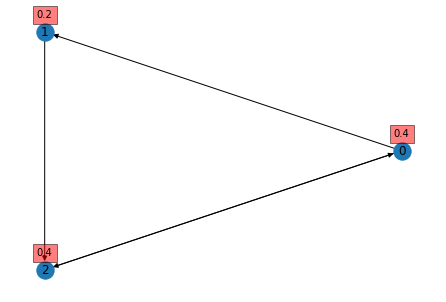

In [25]:
show_graph(G)

Jak widać obliczony graf jest zgodny z przykłądowym

* Testy dla trzech przykłądowych silnie spójnych grafów skierowanych

In [28]:
G = get_full_graph(11)
rank = page_rank(G)
G = label_rank(G,rank)
print(rank)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


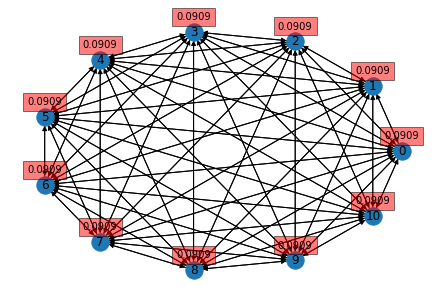

In [29]:
show_graph(G)

Jak w idać w grafie pełnym PageRank podzielił się równomiernie jak oczekiwalismy

In [32]:
G = get_graph(12)
rank = page_rank(G)
G = label_rank(G,rank)
print(rank)

[0.08888808 0.11073621 0.08568043 0.07273854 0.04098152 0.05839156
 0.09574245 0.09475133 0.08808424 0.08663311 0.0982948  0.07907774]


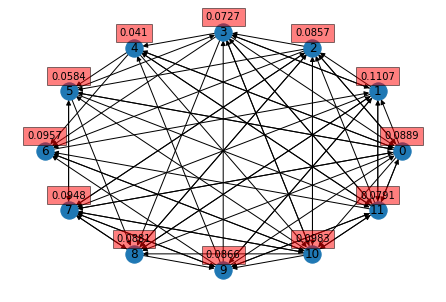

In [33]:
show_graph(G)

In [34]:
G = get_graph(13)
rank = page_rank(G)
G = label_rank(G,rank)
print(rank)

[0.09532278 0.04207513 0.09727601 0.08990252 0.13293427 0.06729355
 0.06461684 0.03756571 0.0520298  0.05517044 0.07916666 0.09873985
 0.08790643]


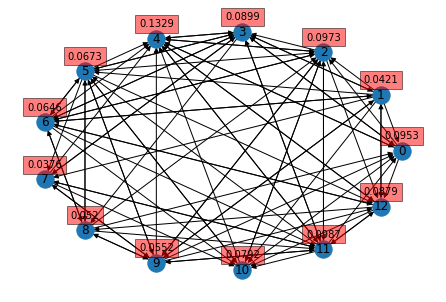

In [35]:
show_graph(G)

<b>Zadanie 1 Page Rank</b> <br><hr>
Rozszerz model z poprzedniego zadania, dodając możliwość skoku do losowego wierzchołka grafu:

\begin{equation*}
r(u) = d\sum_{v\epsilon B_{u}}^{} \frac{r(v)}{N_{v}} + (1 - d)e(u),
\end{equation*}

W zapisie macierzowym:

\begin{equation*}
r(u) = (dA + (1-d)e⊗1)r
\end{equation*}

gdzie ||r|| = 1 (norma L1) ,a e jestwektorem zawierającym prawdopodobieństwa odwiedzania wierzchołków przez losowy skok. Wykorzystaj metodę potęgową do obliczenia Page Rank jako dominującego wektora własnego macierzy B = dA+(1−d)e⊗1.

\begin{equation*}
\left.\begin{matrix}
\\ 1. r_{0}
\\ 2. do
\\ 3. r_{i+1} = Br_{i}
\\ 4. d = ||r_{i}||_{1} - ||r_{i+1}||_{1}
\\ 5. r_{i+1} = r_{i+1} + de
\\ 6. \delta = ||r_{i+1} - r_{i}||_{1}
\\ 7. while (\delta > \epsilon)
\end{matrix}\right|
\end{equation*}


Przetestuj działanie zaimplementowanego algorytmu Page Rank dla wybranych grafów z bazy SNAP. Przetestuj różne wartości parametru d (0.9, 0.85, 0.75, 0.6, 0.5) oraz różne postacie wektora e.

* Funckja

In [37]:
def page_rank_2(G,E,d):
    V = len(G.nodes())
    if(V <= 0):
        return

    A = nx.to_numpy_array(G)
    for e in G.edges():
        n = 0
        for a in A[e[0]]:
            if a > 0:
                n += 1
        A[e[0]][e[1]]/= n

    for i,a in enumerate(A):
        for j,b in enumerate(a):
            A[i][j] *= d

    for i,a in enumerate(A):
        for j,b in enumerate(E):
            A[i][j] += (1-d)*E[j]

    A = np.transpose(A)
    return power_finding(V,A)

* Przetestownie funkcji

Przykładowy graf z wykładów ze Statystki dr hab. Smołki

<img src='img2.jpg'/>

<img src='img3.jpg'/>

<img src='img4.jpg'/>

Przetestowanie powyższego grafu dla równego prawdopodobieństwa odwiedzenia każej ze stron

In [41]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3],rank = 0)
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(0,2)
G.add_edge(3,2)
v = 4
e = [1/v for i in range(0,v)]
print(e)

[0.25, 0.25, 0.25, 0.25]


In [48]:
d = 0.85

[0.37252684 0.19582393 0.39414922 0.0375    ]


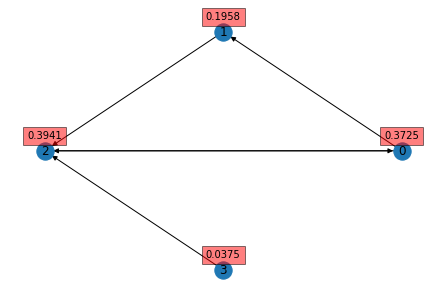

In [49]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

Jak widać wartośći page ranku zgadzają się z wzorcowym przykładem z wykładu

In [45]:
d = 0.9

[0.38177875 0.19680041 0.39642084 0.025     ]


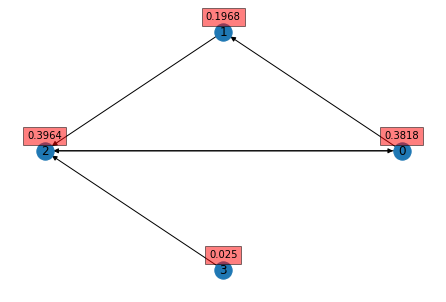

In [46]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

In [50]:
d = 0.75

[0.35384613 0.1951923  0.38846157 0.0625    ]


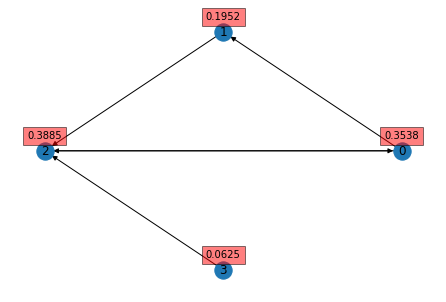

In [51]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

In [52]:
d = 0.6

[0.3258427 0.1977528 0.3764045 0.1      ]


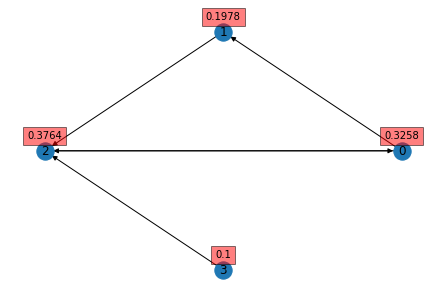

In [53]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

In [58]:
d = 0.5

[0.3076923  0.20192309 0.36538461 0.125     ]


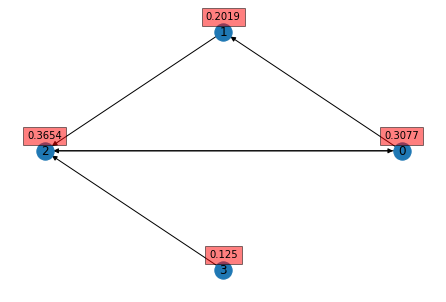

In [59]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

Postać wektora e w której prawdopodobieństwo odwiedzenia jednej ze stron jest większe niż innych

In [61]:
e = [0.6,0.1,0.2,0.1]
d = 0.85

[0.41356697 0.19076599 0.38066703 0.015     ]


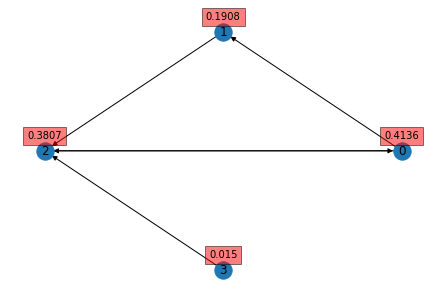

In [62]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

Jak widać rank często odwiedzaniej strony wzósł<br> Zwiekszamy czestosc odwiedzania jeden ze stron

In [65]:
e = [0.9,0.05,0,0.05]
d = 0.85

[0.43968342 0.19436549 0.35845109 0.0075    ]


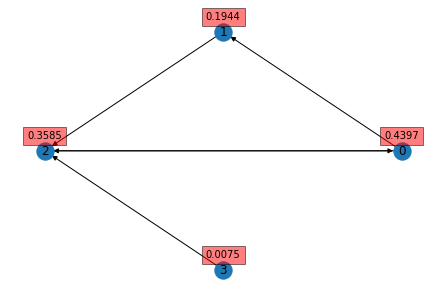

In [66]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

Jak widać rank często odwiedzaniej strony wzósł jeszcze bardziej

Dla prawdopodobiensta odwiedzenia strony 0 równego 1

In [70]:
e = [1,0,0,0]
d = 0.85

[0.45223289 0.19219898 0.35556813 0.        ]


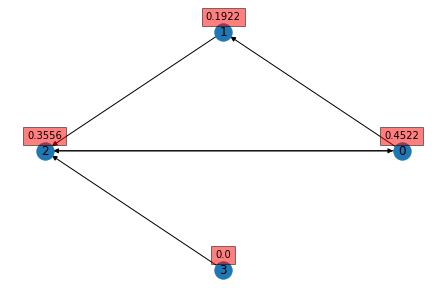

In [71]:
rank = page_rank_2(G,e,d)
G = label_rank(G,rank)
print(rank)
show_graph(G)

* Wnioski

Gdy prawdopodobieństwo skoku na jedną ze stron wzrasta atomatycznie maleje ranking niepowiązanych z nią stron, taką stroną która może mieć duże prawdopodobniństwo skoku jest np. www.google.com. Z pewnością ma ona wysoki rank.

Manipulacja parametrem d sprawia, że połączenia między grafami mają mniejsze lub większe znaczenie w stosunku do prawdopodobieństwa skoku z wektora e.

W praktyce parametr d przyjmuje się w okolicach wartośćći 0.85. Cytat z https://en.wikipedia.org/wiki/PageRank <br>"The probability, at any step, that the person will continue is a damping factor d. Various studies have tested different damping factors, but it is generally assumed that the damping factor will be set around 0.85."

* Test Page Rank dla wybranych grafów z bazy SNAP

Funkcja ładowania grafu z pliku

In [74]:
def open_graph(garph_file):
    G = nx.DiGraph()
    with open(garph_file) as f:
        v, e = [int(x) for x in next(f).split()]
        edges = [[int(x) for x in line.split()] for line in f]

    G.add_nodes_from([i for i in range(v)],rank =0)
    G.add_edges_from(edges)
    return G, v

Ładowanie grafu:

In [77]:
G, v = open_graph('p2p-Gnutella08.txt')
e = [1/v for i in range(0,v)]
rank = page_rank_2(G,e,0.85)
for i,e in enumerate(rank):
    print(f"node: {i} : {e}")

node: 0 : 4.211425777029539e-05
node: 1 : 4.8447054892299763e-05
node: 2 : 0.0001285337916306908
node: 3 : 0.003316578702519478
node: 4 : 0.0041038146659351975
node: 5 : 0.00538666187606282
node: 6 : 4.8447054892299763e-05
node: 7 : 0.004595077109693467
node: 8 : 0.0024319399416657477
node: 9 : 0.0032071512158660543
node: 10 : 0.0007511027889136342
node: 11 : 8.761789705949919e-05
node: 12 : 5.528953379214285e-05
node: 13 : 0.00012211970604612008
node: 14 : 0.0001057130974387411
node: 15 : 0.00014733745196037217
node: 16 : 6.162233091414739e-05
node: 17 : 0.0010181071415789559
node: 18 : 9.329810501020209e-05
node: 19 : 5.528953379214285e-05
node: 20 : 0.00019783793880843135
node: 21 : 0.00028660330627375724
node: 22 : 4.211425777029539e-05
node: 23 : 0.00032186066930763014
node: 24 : 5.4779852014304587e-05
node: 25 : 7.891020337688612e-05
node: 26 : 4.8447054892299763e-05
node: 27 : 6.195596974659762e-05
node: 28 : 6.282223465883964e-05
node: 29 : 0.00013005570233201523
node: 30 : 0.0

node: 1939 : 9.853100796722388e-05
node: 1940 : 0.00031024625953136425
node: 1941 : 6.632667373548228e-05
node: 1942 : 0.00012696078678536084
node: 1943 : 7.866674025371795e-05
node: 1944 : 0.00011679092783570436
node: 1945 : 0.000165855714489077
node: 1946 : 0.00020542694851906845
node: 1947 : 0.00048659467025648825
node: 1948 : 0.00015695318940543463
node: 1949 : 0.00016319024547320861
node: 1950 : 0.0001836771625463913
node: 1951 : 0.00013505653699462432
node: 1952 : 0.0001695805941386035
node: 1953 : 5.169800840761619e-05
node: 1954 : 0.0003464919482241996
node: 1955 : 0.00016558339357355904
node: 1956 : 0.0011471906960305762
node: 1957 : 0.00015374303467241419
node: 1958 : 9.178091469650257e-05
node: 1959 : 0.0001357088728897549
node: 1960 : 0.0001357088728897549
node: 1961 : 0.00018883373733113152
node: 1962 : 0.0001357088728897549
node: 1963 : 0.0001357088728897549
node: 1964 : 5.397732620025659e-05
node: 1965 : 5.397732620025659e-05
node: 1966 : 5.397732620025659e-05
node: 1967

node: 4439 : 9.730066143254484e-05
node: 4440 : 5.1360033432104297e-05
node: 4441 : 8.284991238721587e-05
node: 4442 : 6.104376856936552e-05
node: 4443 : 5.186342083772859e-05
node: 4444 : 5.589971871510869e-05
node: 4445 : 8.927403252656216e-05
node: 4446 : 5.2520420367663176e-05
node: 4447 : 6.359224217158522e-05
node: 4448 : 6.283989921161957e-05
node: 4449 : 5.390439608955627e-05
node: 4450 : 6.145340880732635e-05
node: 4451 : 6.6425247128864e-05
node: 4452 : 5.390439608955627e-05
node: 4453 : 8.147332972071438e-05
node: 4454 : 5.014739515979563e-05
node: 4455 : 0.00012467629972270845
node: 4456 : 5.014739515979563e-05
node: 4457 : 5.251361184356693e-05
node: 4458 : 7.267504619348806e-05
node: 4459 : 0.00011877299592946338
node: 4460 : 5.2374291484870444e-05
node: 4461 : 8.081264242903714e-05
node: 4462 : 7.944225101636388e-05
node: 4463 : 8.835567857642746e-05
node: 4464 : 9.445821399234654e-05
node: 4465 : 8.250629817487302e-05
node: 4466 : 5.433183094187027e-05
node: 4467 : 6.49

In [79]:
G, v = open_graph('email-Eu-core.txt')
e = [1/v for i in range(0,v)]
rank = page_rank_2(G,e,0.85)

for i,e in enumerate(rank):
    print(f"node: {i} : {e}")

node: 0 : 0.0012640497977444204
node: 1 : 0.012093837826254209
node: 2 : 0.0021032509862889165
node: 3 : 0.0017343402061102665
node: 4 : 0.0024586643639826406
node: 5 : 0.0045057117972365
node: 6 : 0.002937684480060188
node: 7 : 0.001979550486183384
node: 8 : 0.001243789063973215
node: 9 : 0.0012114550026447275
node: 10 : 0.001327963489238751
node: 11 : 0.0023154975931750396
node: 12 : 0.0016280692617946866
node: 13 : 0.0021802387990499258
node: 14 : 0.001709254700990701
node: 15 : 0.001584485096150998
node: 16 : 0.002052578503164999
node: 17 : 0.0019088056744298212
node: 18 : 0.0013237038105058426
node: 19 : 0.0021507739874512843
node: 20 : 0.002199826753623976
node: 21 : 0.0037907410009844714
node: 22 : 0.0005372430924511842
node: 23 : 0.002145272685086416
node: 24 : 0.0010136269284418324
node: 25 : 0.0012129513186848045
node: 26 : 0.0010671532040628171
node: 27 : 0.001725682988361153
node: 28 : 0.003024583596771396
node: 29 : 0.0015751290085887903
node: 30 : 0.0018063612154881454
no